In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

pd.set_option('display.max_rows', 100)
sns.set_context('notebook')

In [2]:
def detect_activity(row, activity_list):
    new_row = row
    mask = [1 if activity in row["activities"] else 0 for activity in activity_list]
    new_row[3:] = mask
    return new_row

daylio = pd.read_csv(
    "data/daylio.csv",
    usecols=["full_date", "weekday", "mood", "activities"],
    index_col="full_date",
    parse_dates=True,
)
# parse activities
unique_activities = (
    daylio["activities"].str.split(r"\s*\|\s*", expand=True).stack().unique()
)
daylio["activities"] = daylio.activities.apply(lambda x: x.split(" | "))
for activity in unique_activities:
    daylio[activity] = 0
daylio = daylio.apply(lambda x: detect_activity(x, unique_activities), axis=1)
daylio.drop(columns="activities", inplace=True)
# convert moods to ordinal
mood_map = {"awful": -2, "bad": -1, "meh": 0, "good": 1, "rad": 2}
inv_mood_map = {v:k for k,v in mood_map.items()}
daylio.mood =  daylio.mood.map(mood_map)

# reverse direction so index 0 is the oldest date
daylio = daylio.reindex(index=daylio.index[::-1])

/var/folders/my/lvxg1n852nq3vf2vvjqcrzp80000gn/T/ipykernel_29513/1839680483.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  daylio[activity] = 0
/var/folders/my/lvxg1n852nq3vf2vvjqcrzp80000gn/T/ipykernel_29513/1839680483.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  daylio[activity] = 0
/var/folders/my/lvxg1n852nq3vf2vvjqcrzp80000gn/T/ipykernel_29513/1839680483.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

In [3]:
daylio = daylio.loc['2020-07-22':]

In [4]:
daylio[daylio.Aimovig == 1].index

DatetimeIndex(['2021-03-22', '2021-04-19', '2021-05-17', '2021-06-14',
               '2021-08-12', '2021-09-10'],
              dtype='datetime64[ns]', name='full_date', freq=None)

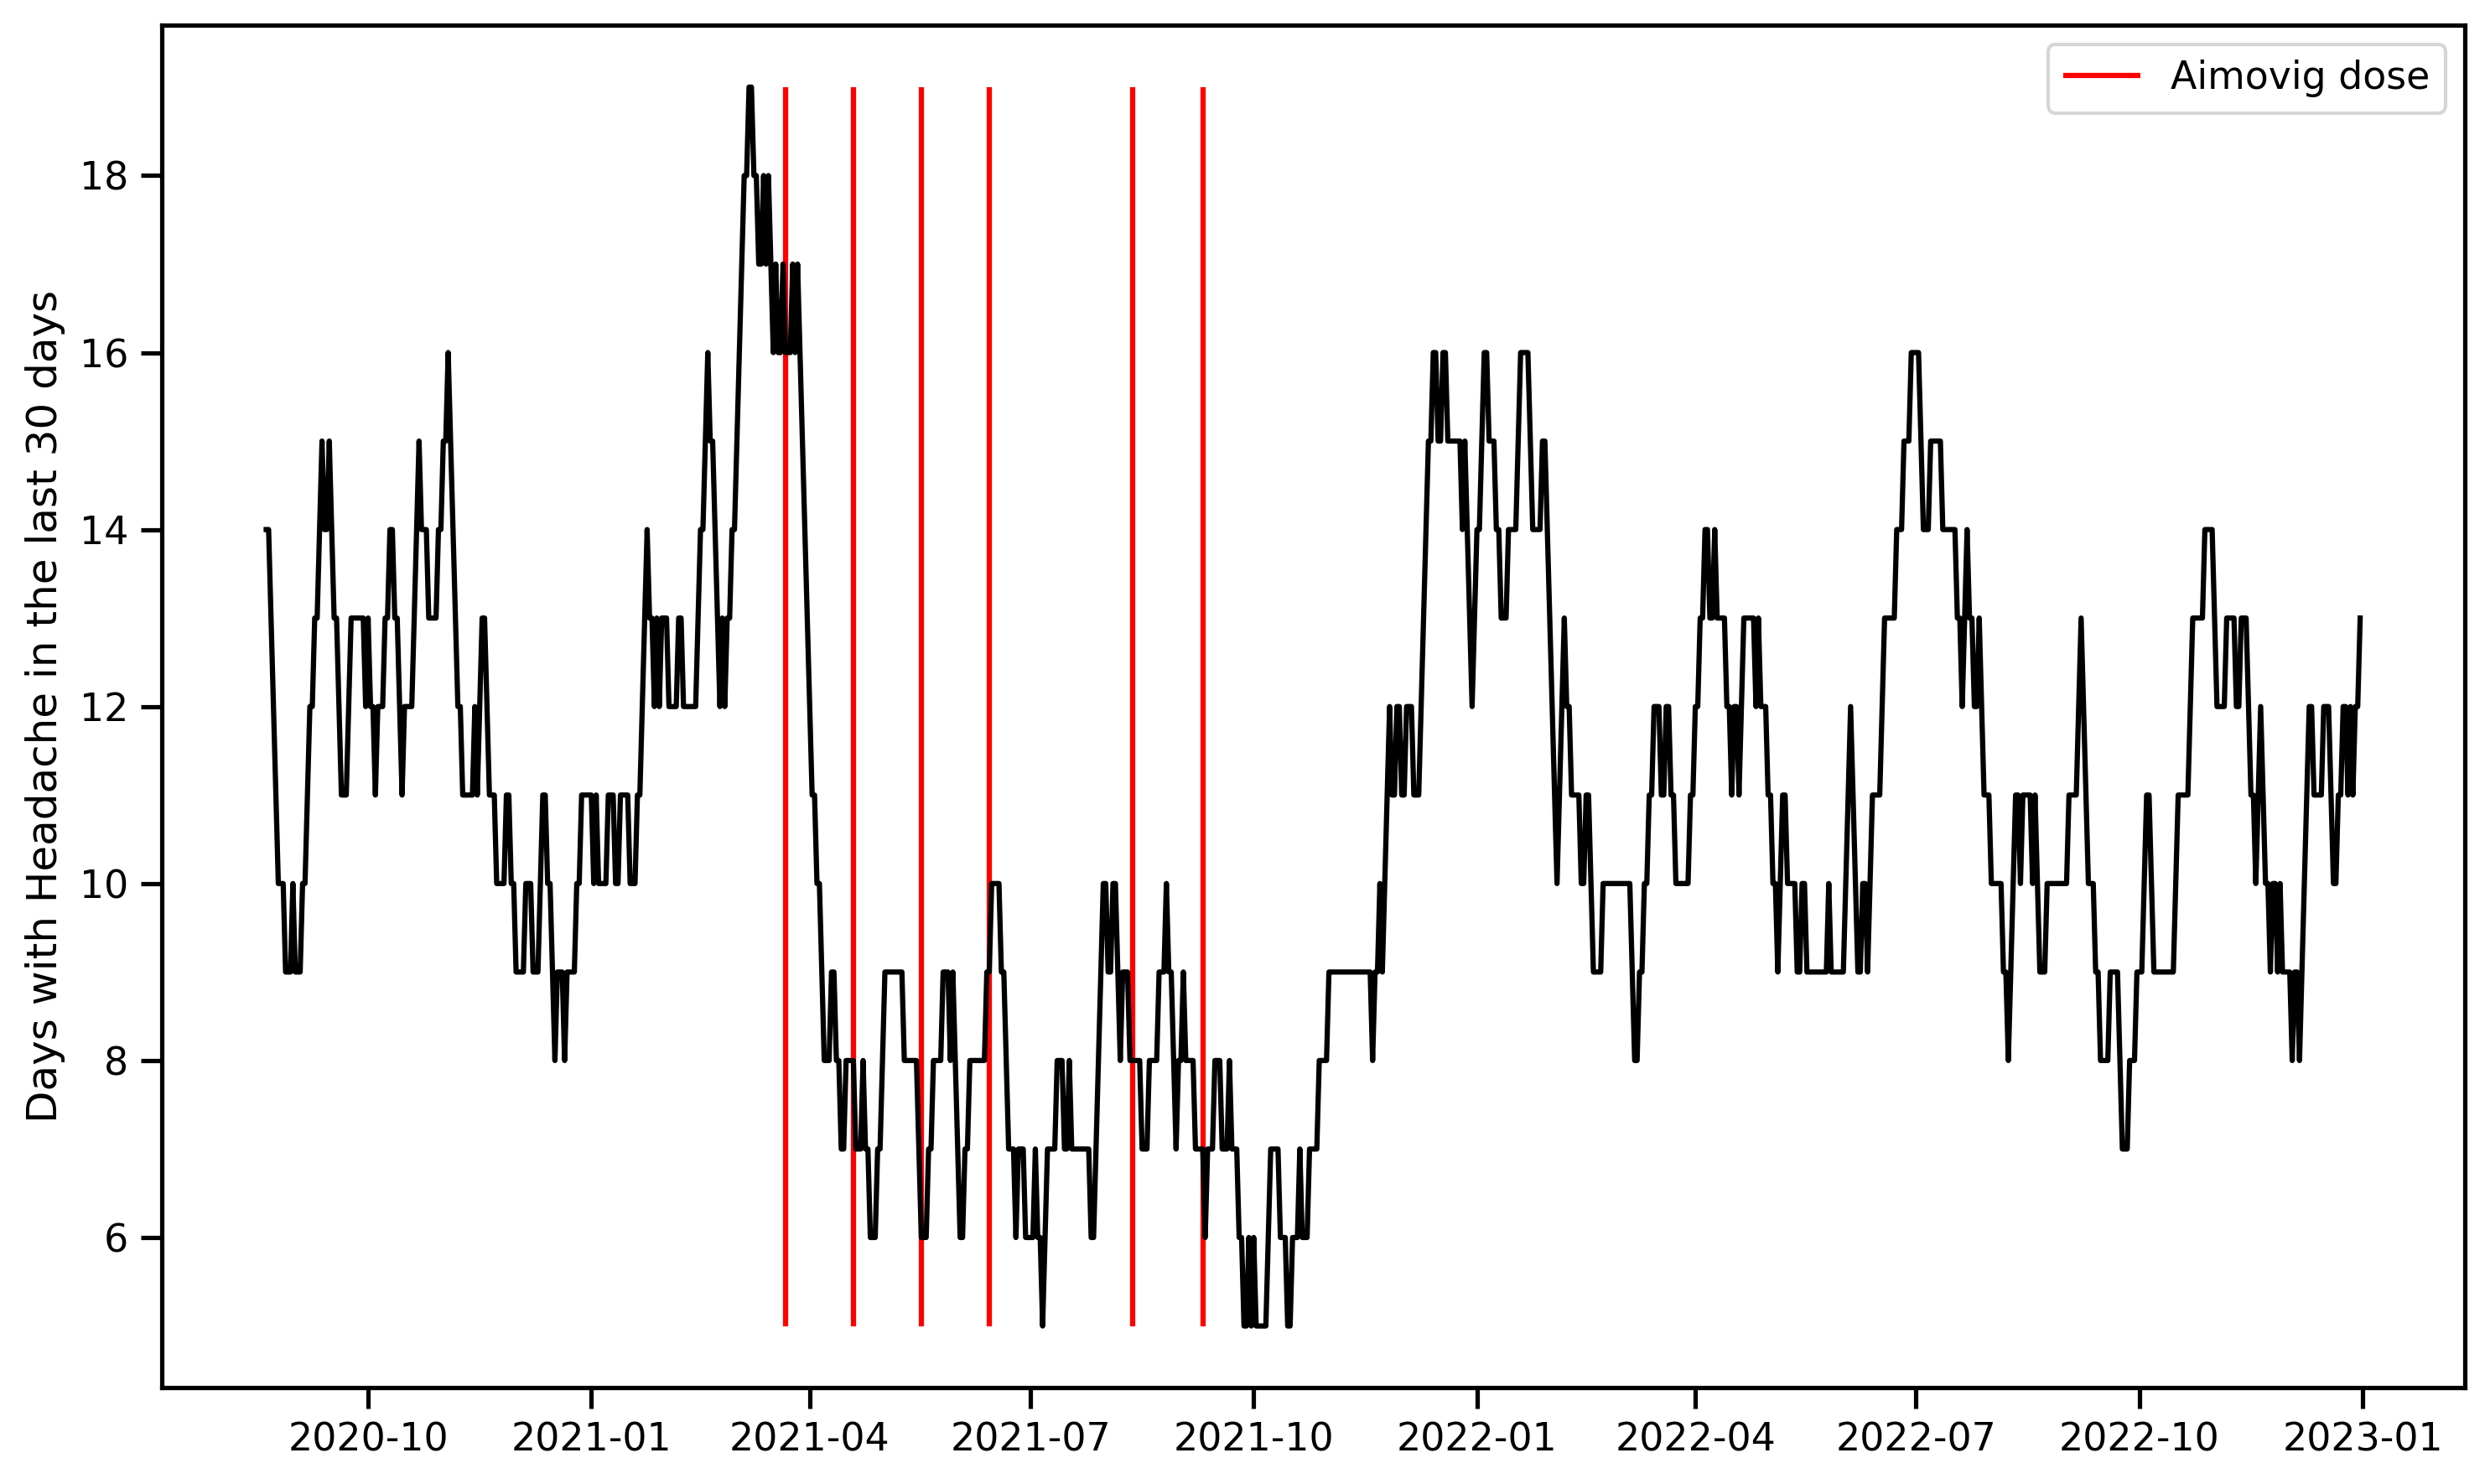

In [5]:
f, ax1 = plt.subplots(1, 1, dpi=300, figsize=(10, 6))

roll_window = 30

total_headaches = daylio.Headache.rolling(roll_window).sum()
total_ibuprofen = daylio.Ibuprofen.rolling(roll_window).sum()
aimovig = daylio[daylio.Aimovig == 1].index
amitriptyline = daylio[daylio.Amitriptyline == 1].index


# ax1.vlines(
#     amitriptyline,
#     ymin=total_headaches.min(),
#     ymax=total_headaches.max(),
#     color="lightblue",
#     label="amitriptyline dose", linewidth=0.5, alpha=0.5
# )
ax1.vlines(
    aimovig,
    ymin=total_headaches.min(),
    ymax=total_headaches.max(),
    color="red",
    label="Aimovig dose",
)
ax1.plot(total_headaches, color='black')
# ax1.plot(total_ibuprofen, color='grey', alpha=0.5, label='ibuprofen')
ax1.set_ylabel(f"Days with Headache in the last {roll_window} days")
# ax1.set_xlabel("Date")
ax1.legend()
f.set_tight_layout(True)
plt.savefig(
    "/Users/thesofakillers/Desktop/headaches-aimovig.png",
    dpi=300,
    bbox_inches="tight",
    transparent=False,
    facecolor="white",
)
plt.show()